<a href="https://colab.research.google.com/github/FelipeRuanMarinheiro/FelipeRuanMarinheiro/blob/main/Wealth_Management_BI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise dados -  Backoffice - Wealth Management



##Libraries

In [ ]:
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



##Tratamento e Análise Exploratória

In [ ]:
df = pd.read_excel('df_guia.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 61 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   dataf_c          751 non-null    object
 1   dataf_up         751 non-null    object
 2   lista            751 non-null    object
 3   cliente          751 non-null    object
 4   membro           749 non-null    object
 5   consultor        751 non-null    object
 6   AGORA            751 non-null    bool  
 7   APEX             751 non-null    bool  
 8   AUVP             751 non-null    bool  
 9   AVENUE           751 non-null    bool  
 10  AVENUE NV        751 non-null    bool  
 11  AMERICANA        751 non-null    bool  
 12  BANCO DO BRASIL  751 non-null    bool  
 13  BANCO SAFRA      751 non-null    bool  
 14  SOFISA           751 non-null    bool  
 15  BANCOIN          751 non-null    bool  
 16  BANRISUL         751 non-null    bool  
 17  BINANCE          751 non-null    bo

In [ ]:
#Alteração para datetime

df['dataf_c'] = pd.to_datetime(df['dataf_c'], format='%d/%m/%Y')
df['dataf_up'] = pd.to_datetime(df['dataf_up'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 61 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   dataf_c          751 non-null    datetime64[ns]
 1   dataf_up         751 non-null    datetime64[ns]
 2   lista            751 non-null    object        
 3   cliente          751 non-null    object        
 4   membro           749 non-null    object        
 5   consultor        751 non-null    object        
 6   AGORA            751 non-null    bool          
 7   APEX             751 non-null    bool          
 8   AUVP             751 non-null    bool          
 9   AVENUE           751 non-null    bool          
 10  AVENUE NV        751 non-null    bool          
 11  AMERICANA        751 non-null    bool          
 12  BANCO DO BRASIL  751 non-null    bool          
 13  BANCO SAFRA      751 non-null    bool          
 14  SOFISA           751 non-null    bool     

In [ ]:
df['n'] = 1


       dataf_c   dataf_up       lista                              cliente  \
0   2024-04-04 2024-04-04     A fazer                César Martins Machado   
1   2023-12-20 2024-04-03  Aguardando           Rafael Gioscia Leal Strack   
2   2023-12-18 2024-04-03  Aguardando                        Paulo Stasiak   
3   2024-01-04 2024-04-03  Aguardando                Celso Mangili Eulálio   
4   2024-02-23 2024-03-19  Aguardando  Bárbara Wildeisen de Oliveira Mello   
..         ...        ...         ...                                  ...   
746 2023-06-16 2024-04-04    Distrato                    João Luiz Hippler   
747 2023-05-17 2024-04-04    Distrato                  Luiz Carlos Hippler   
748 2023-06-01 2024-04-04    Distrato                Marcela Regina Becker   
749 2023-05-31 2024-04-04    Distrato                     Marilene Hippler   
750 2023-08-04 2024-04-05    Distrato        Filipe da Cruz Machado Araujo   

                                 membro        consultor  AGORA

## Gráficos B.I

In [ ]:
# display(df)

Text(0.5, 1.0, 'Engajamento Consultores-Backoffice\n')

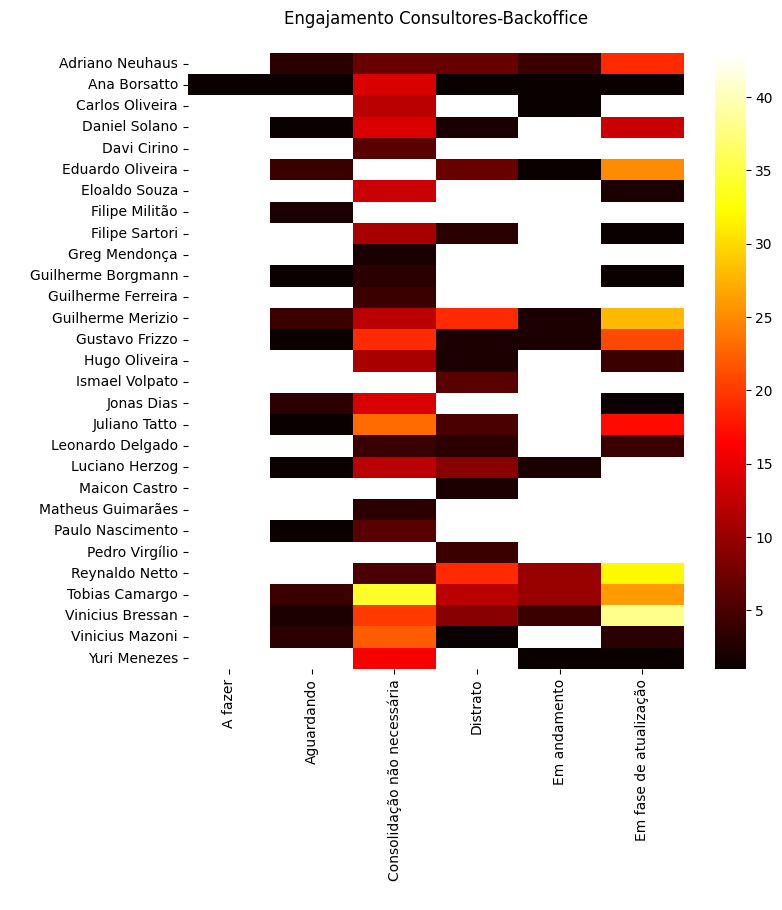

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
dfdhist = pd.DataFrame({
    x_label: grp['consultor'].value_counts()
    for x_label, grp in df.groupby('lista')
})
sns.heatmap(dfdhist, cmap='hot')
plt.xlabel(' ')
_ = plt.ylabel(' ')
plt.title('Engajamento Consultores-Backoffice''\n')

Text(0.5, 1.0, 'Engajamento Backoffice\n')

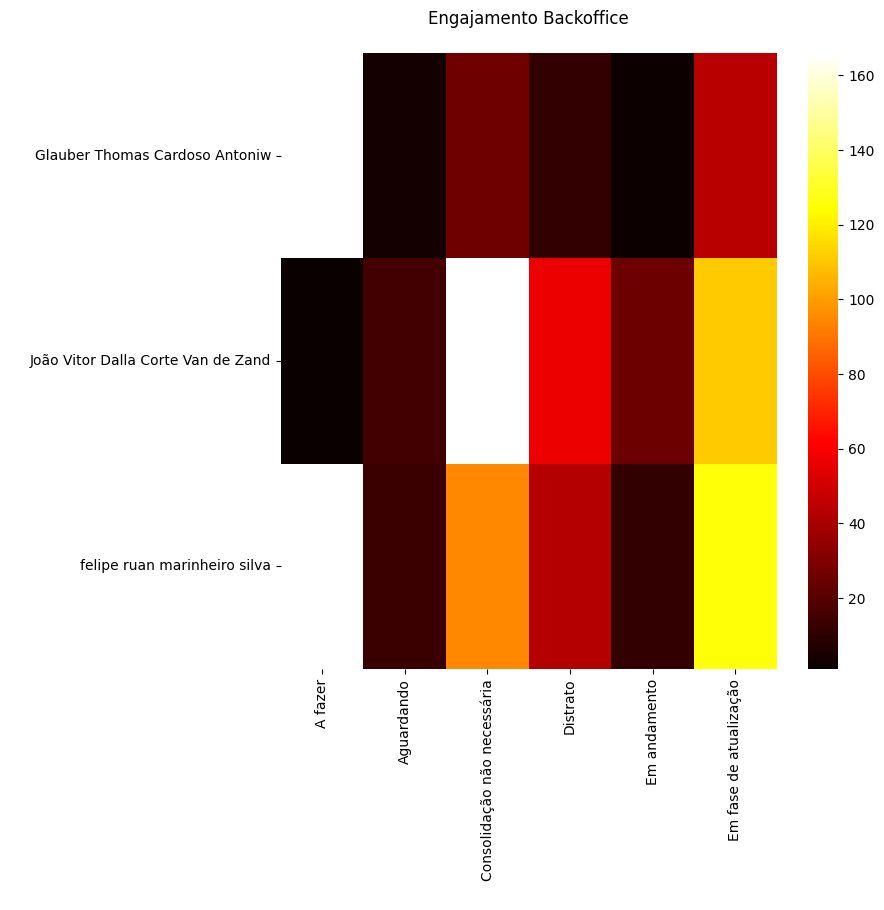

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_dhist = pd.DataFrame({
    x_label: grp['membro'].value_counts()
    for x_label, grp in df.groupby('lista')
})
sns.heatmap(df_dhist, cmap='hot')
plt.xlabel(' ')
_ = plt.ylabel(' ')
plt.title('Engajamento Backoffice''\n')

Text(0.5, 1.0, 'Distribuição Listas - Clientes\n')

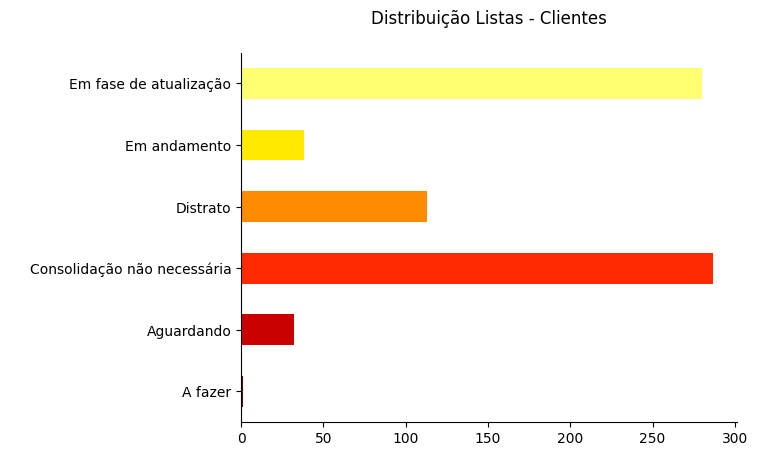

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('lista').size().plot(kind='barh', color=sns.palettes.mpl_palette('hot'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel(' ')
plt.title('Distribuição Listas - Clientes''\n')

Text(0.5, 1.0, 'Distribuição Clientes por Backofficer\n')

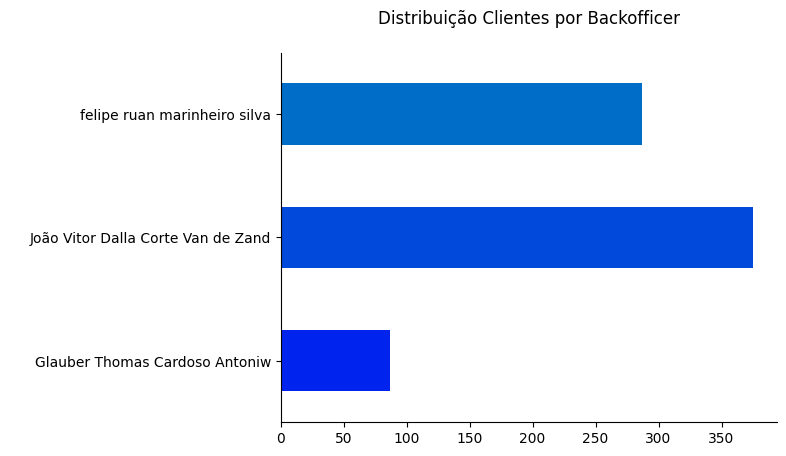

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('membro').size().plot(kind='barh', color=sns.palettes.mpl_palette('winter'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel(' ')
plt.title('Distribuição Clientes por Backofficer''\n')

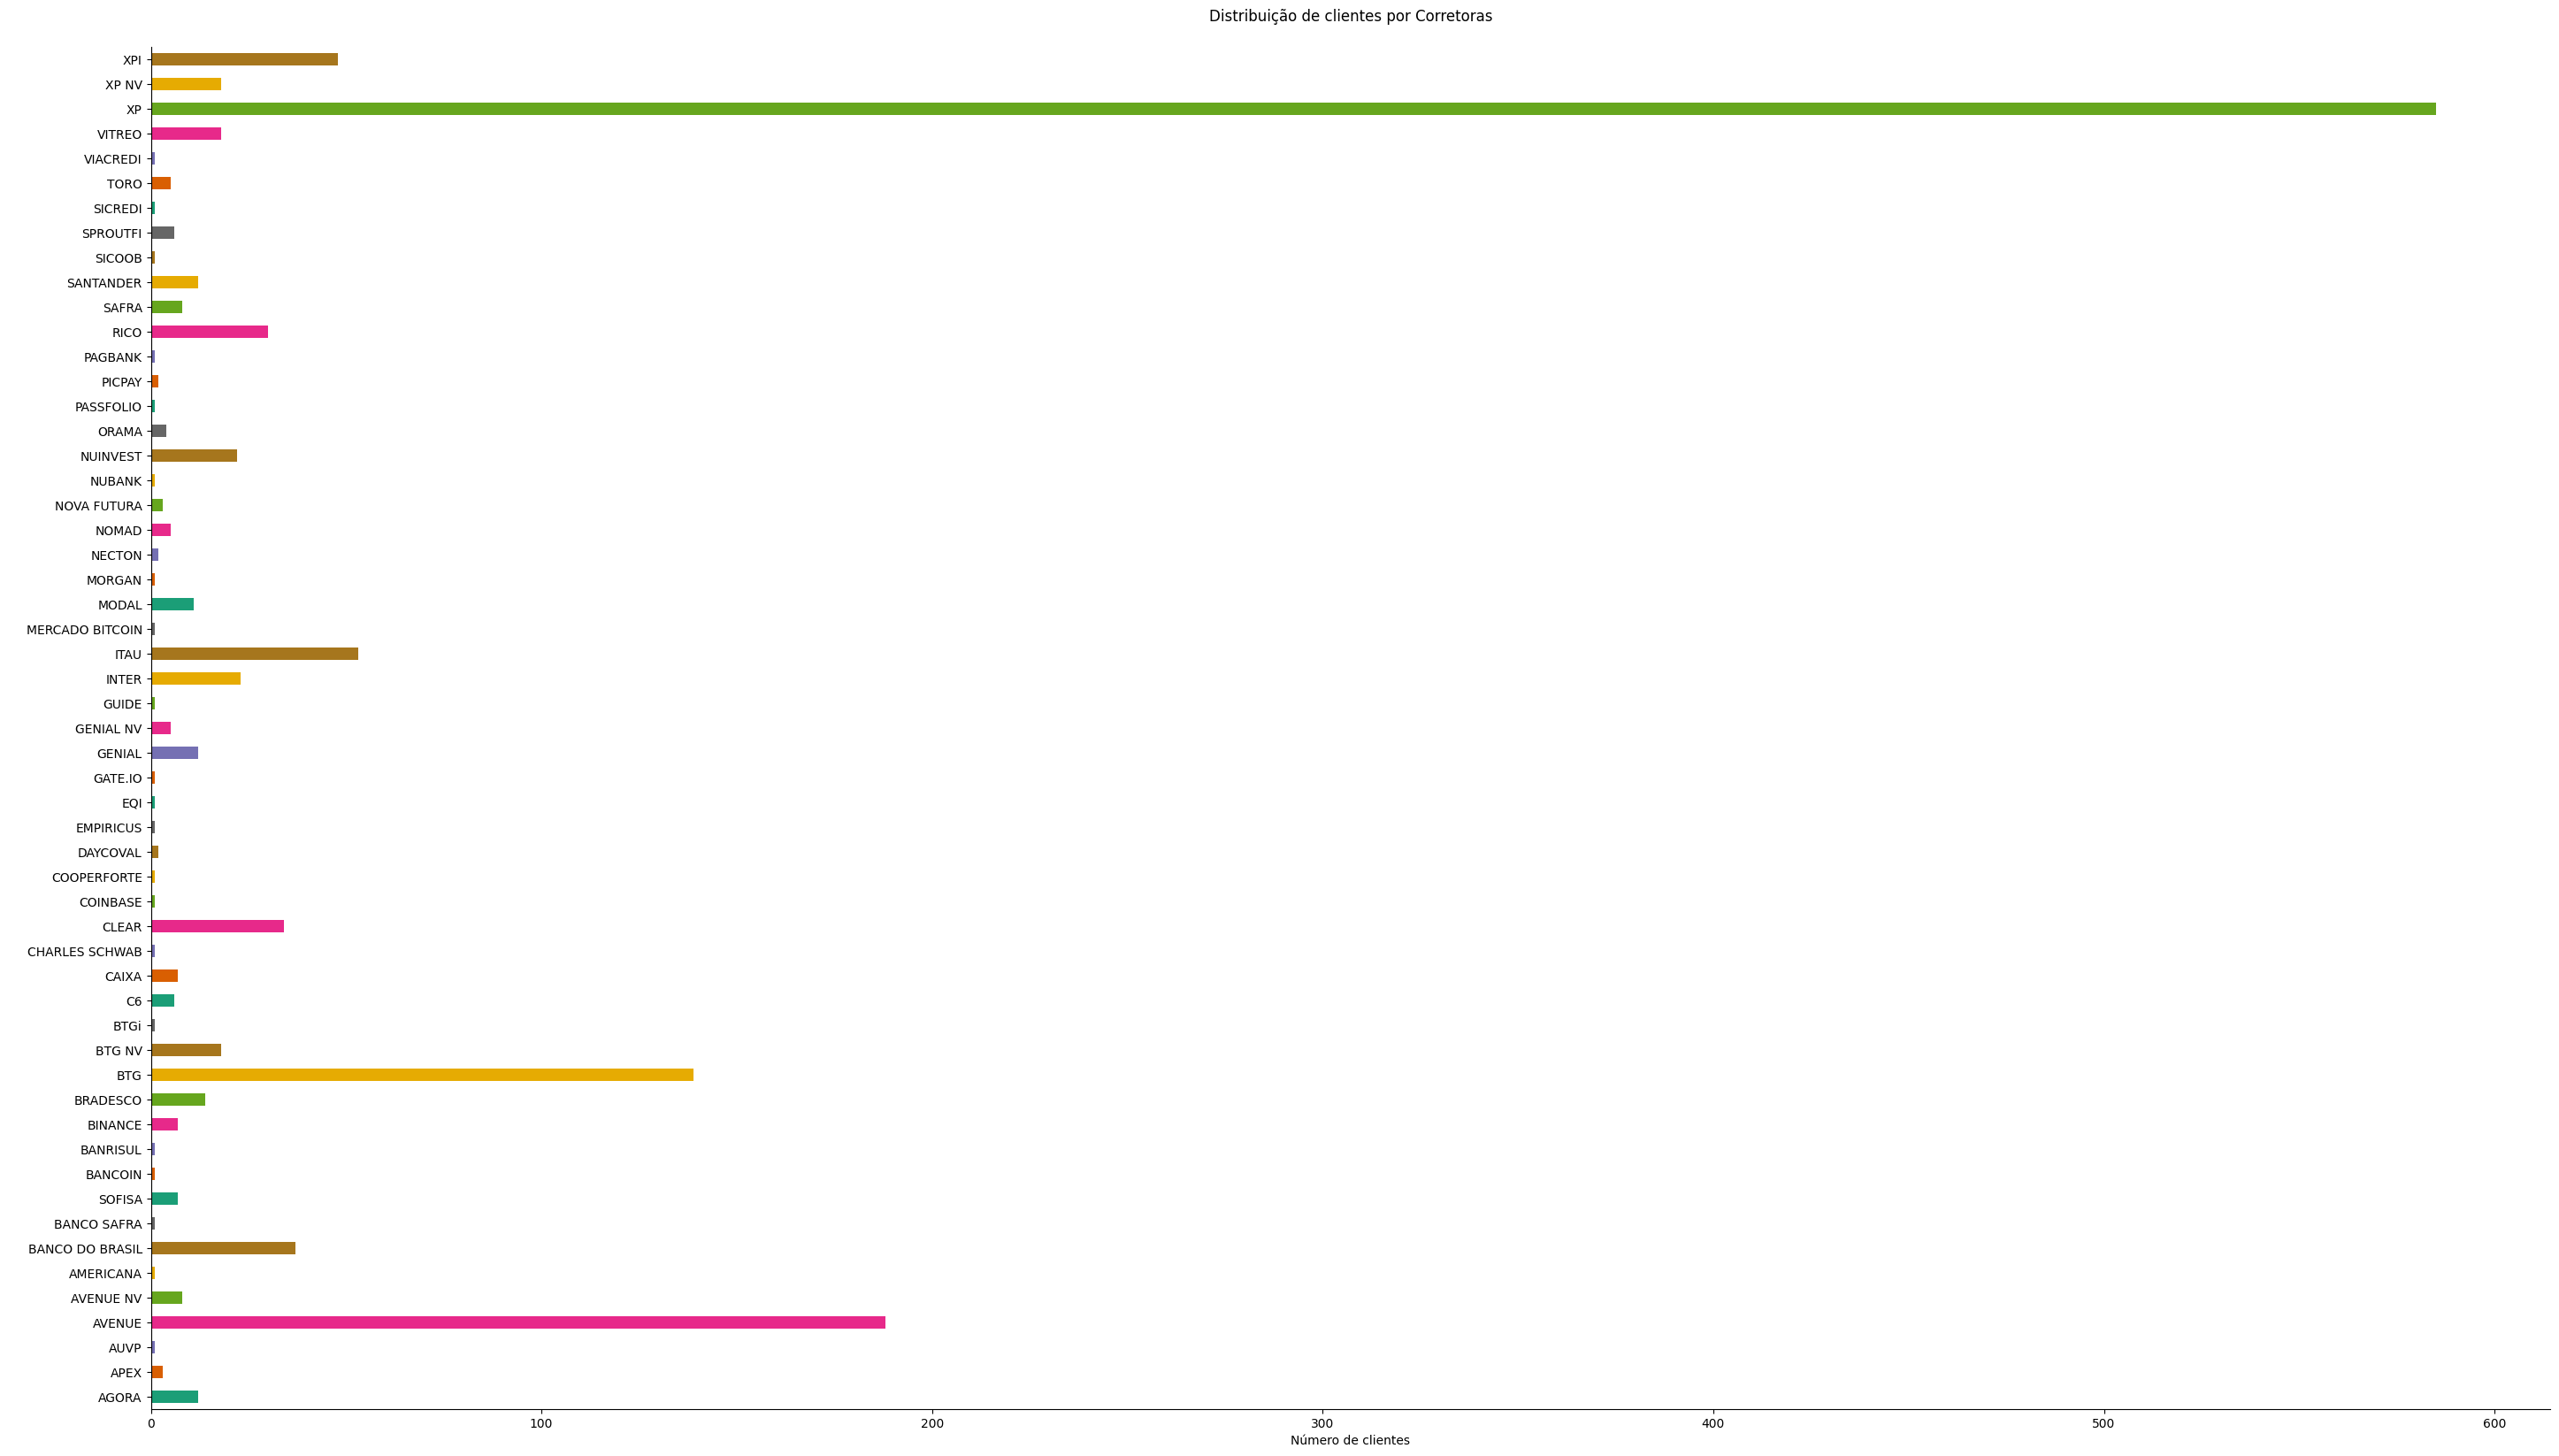

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Selecionando as colunas de 6 a 15
df_grouped = df.iloc[:, 6:89]

# Somando os valores True em cada coluna
grouped_sum = df_grouped.sum()

# Plotando o gráfico de barras horizontal
plt.figure(figsize=(35, 20))
grouped_sum.plot(kind='barh', color=sns.color_palette("Dark2", len(grouped_sum)))

# Removendo as bordas superior e direita do gráfico
plt.gca().spines[['top', 'right']].set_visible(False)

# Configurando os rótulos dos eixos
plt.ylabel(' ')
plt.xlabel('Número de clientes')
plt.title('Distribuição de clientes por Corretoras''\n')

# Exibindo o gráfico

plt.show()

### Gráficos B.I - DISTRATO


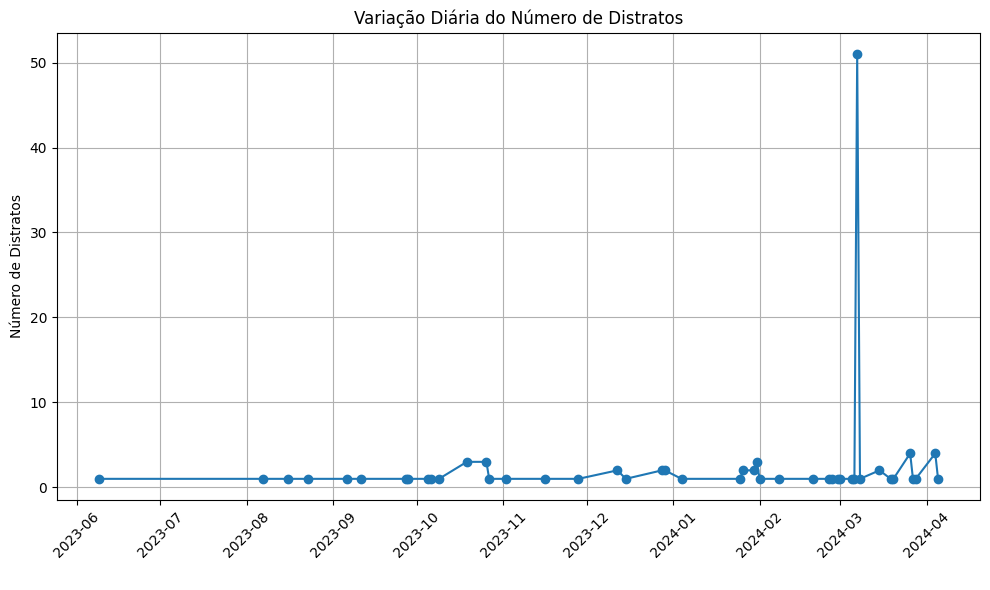

In [ ]:
# Filtrar as linhas onde a coluna 'lista' é igual a 'Distrato'
distratos = df[df['lista'] == 'Distrato']

# Agrupar os dados por data e contar o número de ocorrências de distratos em cada dia
distratos_por_dia = distratos.groupby('dataf_up').size().reset_index(name='Numero de Distratos')

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(distratos_por_dia['dataf_up'], distratos_por_dia['Numero de Distratos'], marker='o', linestyle='-')
plt.title('Variação Diária do Número de Distratos')
plt.xlabel(' ')
plt.ylabel('Número de Distratos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

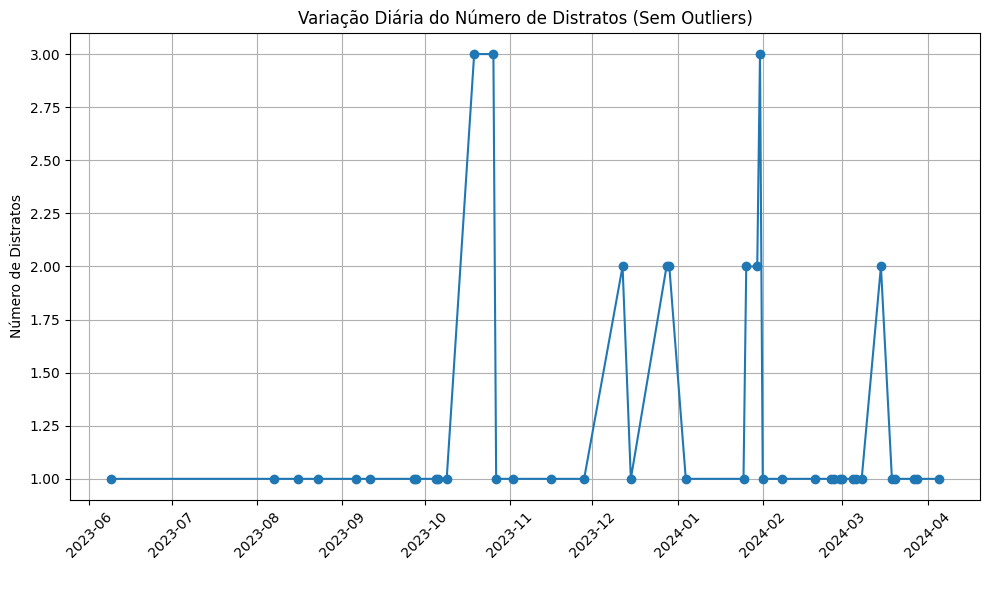

In [ ]:
# Filtrar as linhas onde a coluna 'lista' é igual a 'Distrato'
distratos = df[df['lista'] == 'Distrato']

# Agrupar os dados por data e contar o número de ocorrências de distratos em cada dia
distratos_por_dia = distratos.groupby('dataf_up').size().reset_index(name='Numero de Distratos')

# Calcular o IQR (Intervalo Interquartil)
Q1 = distratos_por_dia['Numero de Distratos'].quantile(0.25)
Q3 = distratos_por_dia['Numero de Distratos'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
distratos_sem_outliers = distratos_por_dia[(distratos_por_dia['Numero de Distratos'] >= limite_inferior) & (distratos_por_dia['Numero de Distratos'] <= limite_superior)]

# Plotar o gráfico sem outliers
plt.figure(figsize=(10, 6))
plt.plot(distratos_sem_outliers['dataf_up'], distratos_sem_outliers['Numero de Distratos'], marker='o', linestyle='-')
plt.title('Variação Diária do Número de Distratos (Sem Outliers)')
plt.xlabel(' ')
plt.ylabel('Número de Distratos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

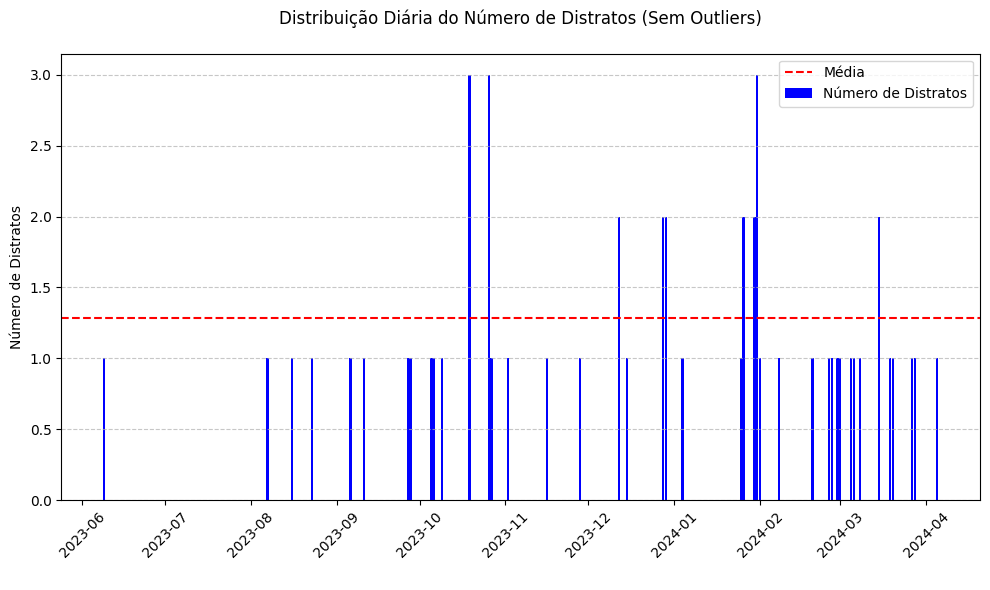

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['dataf_up'] = pd.to_datetime(df['dataf_up'])

# Filtrar as linhas onde a coluna 'lista' é igual a 'Distrato'
distratos = df[df['lista'] == 'Distrato']

# Agrupar os dados por data e contar o número de ocorrências de distratos em cada dia
distratos_por_dia = distratos.groupby('dataf_up').size().reset_index(name='Numero de Distratos')

# Calcular o IQR (Intervalo Interquartil)
Q1 = distratos_por_dia['Numero de Distratos'].quantile(0.25)
Q3 = distratos_por_dia['Numero de Distratos'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
distratos_sem_outliers = distratos_por_dia[(distratos_por_dia['Numero de Distratos'] >= limite_inferior) & (distratos_por_dia['Numero de Distratos'] <= limite_superior)]

# Calcular a média dos distratos por dia
media_distratos = distratos_sem_outliers['Numero de Distratos'].mean()

# Plotar o gráfico de distribuição em barras sem outliers
plt.figure(figsize=(10, 6))
plt.bar(distratos_sem_outliers['dataf_up'], distratos_sem_outliers['Numero de Distratos'], color='b', label='Número de Distratos')
plt.axhline(y=media_distratos, color='red', linestyle='--', label='Média')
plt.title('Distribuição Diária do Número de Distratos (Sem Outliers)''\n')
plt.xlabel(' ')
plt.ylabel('Número de Distratos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


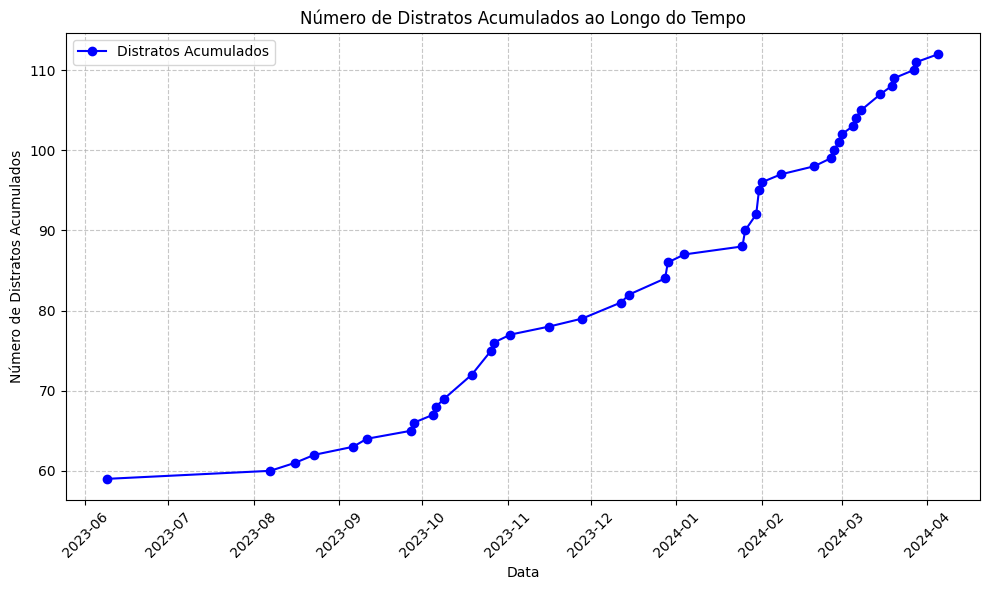

In [ ]:
# Filtrar as linhas onde a coluna 'lista' é igual a 'Distrato'
distratos = df[df['lista'] == 'Distrato']

valor_inicial = 58 #Ajuste

# Agrupar os dados por data e contar o número de ocorrências de distratos em cada dia
distratos_por_dia = distratos.groupby('dataf_up').size().reset_index(name='Numero de Distratos')

# Calcular o IQR (Intervalo Interquartil)
Q1 = distratos_por_dia['Numero de Distratos'].quantile(0.25)
Q3 = distratos_por_dia['Numero de Distratos'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
distratos_sem_outliers = distratos_por_dia[(distratos_por_dia['Numero de Distratos'] >= limite_inferior) & (distratos_por_dia['Numero de Distratos'] <= limite_superior)]

# Calcular a soma cumulativa dos distratos por dia
distratos_acumulados = distratos_sem_outliers['Numero de Distratos'].cumsum() + valor_inicial

# Plotar o gráfico de linha dos distratos acumulados
plt.figure(figsize=(10, 6))
plt.plot(distratos_sem_outliers['dataf_up'], distratos_acumulados, color='b', marker='o', linestyle='-', label='Distratos Acumulados')
plt.title('Número de Distratos Acumulados ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Distratos Acumulados')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



<ipython-input-117-1b6861b6abae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distratos_sem_outliers['data_numerica'] = distratos_sem_outliers['dataf_up'].apply(lambda x: x.toordinal())
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     1054.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           2.31e-30
Time:                        20:19:28   Log-Likelihood:                -108.41
No. Observations:                  42   AIC:                             220.8
Df Residuals:                      40   BIC:                             224.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.546e+05   4764.328    -32.452

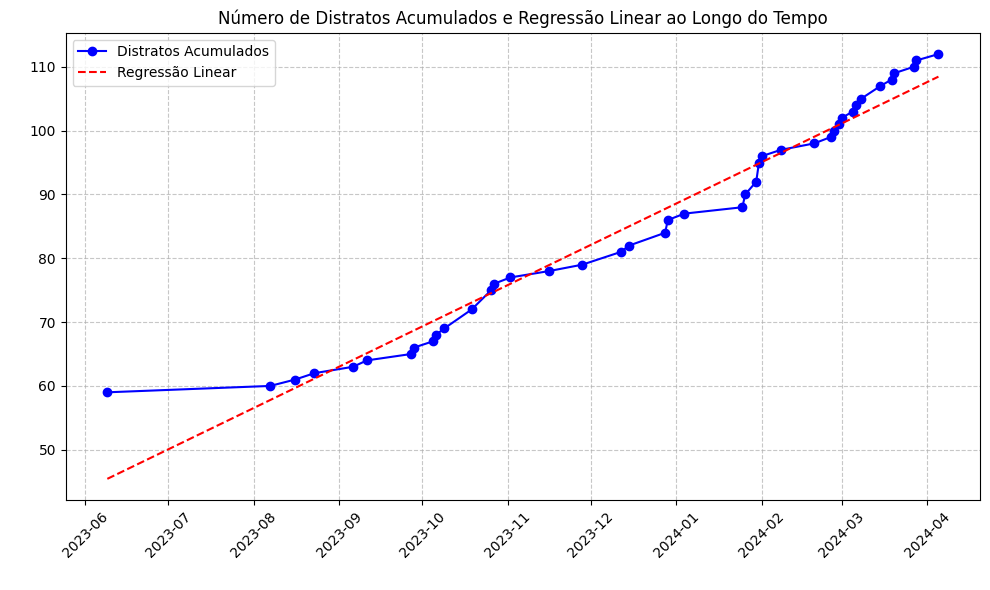

Previsão de regressão a partir de abril/2024
Equação da regressão: Distratos = 113 + 0.21 * Numero de dias a partir de abril


In [ ]:


# Converter as datas para números sequenciais para a regressão
distratos_sem_outliers['data_numerica'] = distratos_sem_outliers['dataf_up'].apply(lambda x: x.toordinal())

# Extrair as features (variáveis independentes) e o target (variável dependente)
X = distratos_sem_outliers[['data_numerica']]
y = distratos_acumulados.values.reshape(-1, 1)  # Precisamos redimensionar y para 2D para compatibilidade com scikit-learn

# Ajuste do modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X, y)

# Fazer previsões para o período de tempo existente
previsao_data = pd.date_range(start=distratos_sem_outliers['dataf_up'].min(), end=distratos_sem_outliers['dataf_up'].max(), freq='D')
previsao_data_numerica = previsao_data.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
previsao_distratos_acumulados = regressor.predict(previsao_data_numerica)

# Adicionando a coluna de previsão ao DataFrame de previsão
previsao_df = pd.DataFrame({'dataf_up': previsao_data, 'Numero de Distratos Acumulados': previsao_distratos_acumulados.flatten()})

X = sm.add_constant(X)

# Inicializar e ajustar o modelo de regressão linear com statsmodels
modelo_regressao = sm.OLS(y, X)
resultado_regressao = modelo_regressao.fit()

# Imprimir um resumo dos resultados da regressão
print(resultado_regressao.summary())


# Plotar o gráfico com a regressão
plt.figure(figsize=(10, 6))
plt.plot(distratos_sem_outliers['dataf_up'], distratos_acumulados, color='b', marker='o', linestyle='-', label='Distratos Acumulados')
plt.plot(previsao_df['dataf_up'], previsao_df['Numero de Distratos Acumulados'], color='red', linestyle='--', label='Regressão Linear')
plt.title('Número de Distratos Acumulados e Regressão Linear ao Longo do Tempo')
plt.xlabel(' ')
plt.ylabel(' ')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Obtendo os coeficientes da regressão
coeficiente_slope = regressor.coef_[0][0]
intercepto = regressor.intercept_[0]

# Mostrando a equação da regressão
print('Previsão de regressão a partir de abril/2024')
equacao_regressao = f'Distratos = 113 + {coeficiente_slope:.2f} * Numero de dias a partir de abril'
print('Equação da regressão:', equacao_regressao)


### Gráficos B.I - CONTRATOS





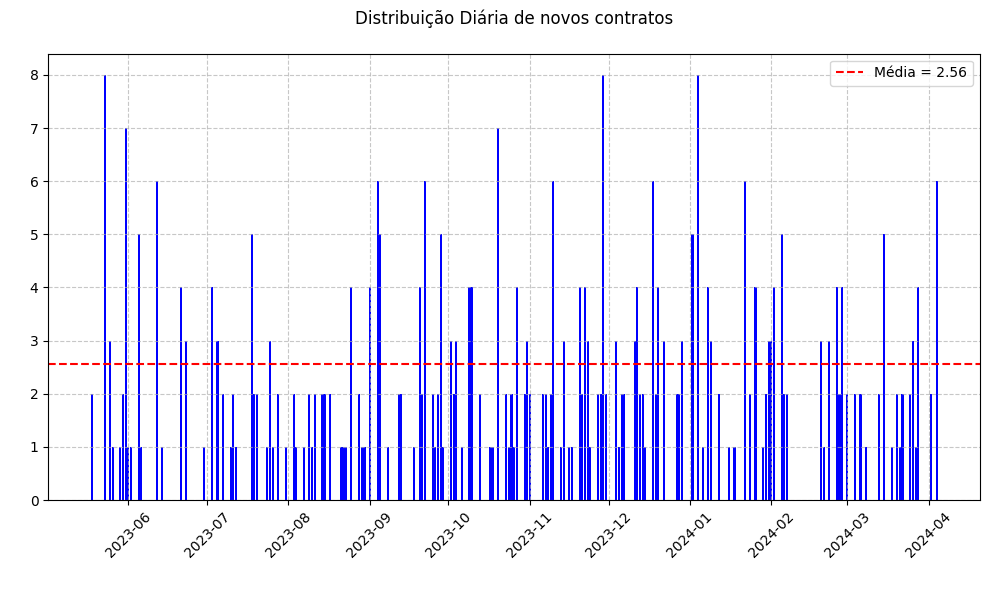

In [ ]:

# Calcular os quartis
Q1 = distribuicao_diaria['n'].quantile(0.25)
Q3 = distribuicao_diaria['n'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites inferior e superior para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
distribuicao_sem_outliers = distribuicao_diaria[(distribuicao_diaria['n'] >= limite_inferior) & (distribuicao_diaria['n'] <= limite_superior)]

#media
media = distribuicao_sem_outliers['n'].mean()

# Plotar o gráfico de distribuição sem outliers com a média
plt.figure(figsize=(10, 6))
plt.bar(distribuicao_sem_outliers['dataf_c'], distribuicao_sem_outliers['n'], color='b')
plt.axhline(y=media, color='red', linestyle='--', label=f'Média = {media:.2f}')
plt.title('Distribuição Diária de novos contratos' '\n')
plt.xlabel(' ')
plt.ylabel(' ')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


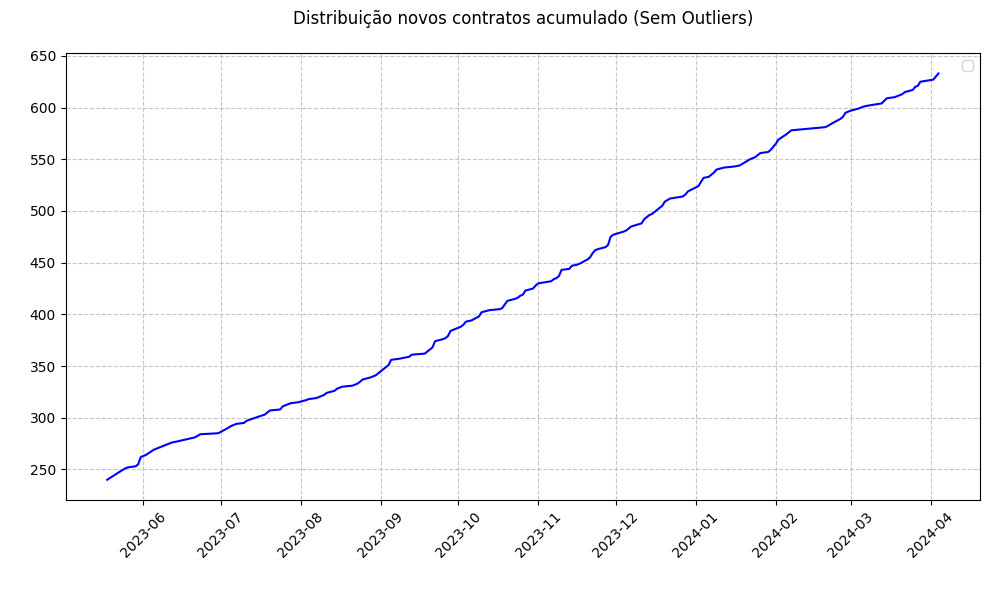

In [ ]:
# Calcular a distribuição acumulada da coluna 'n' ao longo do tempo
distribuicao_acumulada = distribuicao_sem_outliers.groupby('dataf_c')['n'].sum().cumsum().reset_index()

# Ajustar o valor inicial para 238
valor_inicial = 238


# Ajustar a distribuição acumulada para partir do valor inicial
distribuicao_acumulada['n'] += valor_inicial

# Plotar o gráfico de linhas da distribuição acumulada
plt.figure(figsize=(10, 6))
plt.plot(distribuicao_acumulada['dataf_c'], distribuicao_acumulada['n'], color='b', marker=' ', linestyle='-')
plt.title('Distribuição novos contratos acumulado (Sem Outliers)' '\n')
plt.xlabel(' ')
plt.ylabel(' ')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


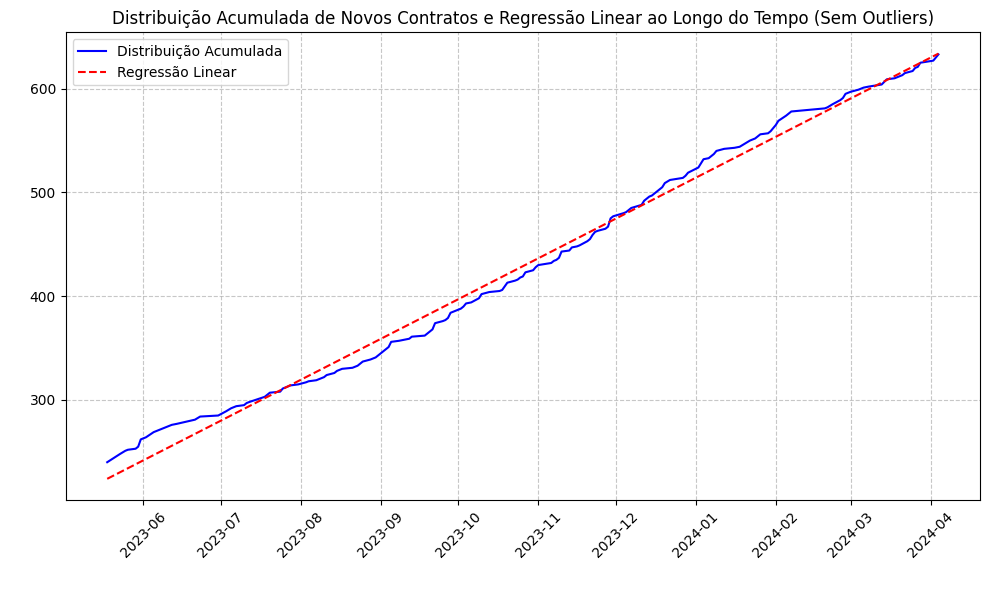

                            OLS Regression Results                            
Dep. Variable:                      n   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.841e+04
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          1.64e-160
Time:                        20:35:52   Log-Likelihood:                -576.68
No. Observations:                 154   AIC:                             1157.
Df Residuals:                     152   BIC:                             1163.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.398e+05   6929.575   -135.624

In [ ]:
from sklearn.linear_model import LinearRegression

# Converter as datas para números sequenciais para a regressão
distribuicao_acumulada['data_numerica'] = distribuicao_acumulada['dataf_c'].apply(lambda x: x.toordinal())

# Extrair as features (variáveis independentes) e o target (variável dependente)
X = distribuicao_acumulada[['data_numerica']]
y = distribuicao_acumulada['n']

# Inicializar e ajustar o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X, y)

# Fazer previsões para o período de tempo existente
previsao_data = pd.date_range(start=distribuicao_acumulada['dataf_c'].min(), end=distribuicao_acumulada['dataf_c'].max(), freq='D')
previsao_data_numerica = previsao_data.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
previsao_distribuicao_acumulada = regressor.predict(previsao_data_numerica)

# Plotar o gráfico de linhas da distribuição acumulada com a regressão linear
plt.figure(figsize=(10, 6))
plt.plot(distribuicao_acumulada['dataf_c'], distribuicao_acumulada['n'], color='b', marker=' ', linestyle='-', label='Distribuição Acumulada')
plt.plot(previsao_data, previsao_distribuicao_acumulada, color='red', linestyle='--', label='Regressão Linear')
plt.title('Distribuição Acumulada de Novos Contratos e Regressão Linear ao Longo do Tempo (Sem Outliers)')
plt.xlabel(' ')
plt.ylabel(' ')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Adicionar uma constante ao conjunto de dados
X = sm.add_constant(X)

# Inicializar e ajustar o modelo de regressão linear com statsmodels
modelo_regressao = sm.OLS(y, X)
resultado_regressao_contratos = modelo_regressao.fit()

# Imprimir um resumo dos resultados da regressão
print(resultado_regressao_contratos.summary())

# Obtendo os coeficientes da regressão
coeficiente_slope_contracts = resultado_regressao_contratos.params['data_numerica']
intercepto_contracts = resultado_regressao_contratos.params['const']

print()
# Mostrando a equação da regressão
print('Previsão de regressão a partir de abril/2024 para novos contratos')
equacao_regressao_contracts = f'Novos Contratos = 638 + {coeficiente_slope_contracts:.2f} * Número de dias a partir de abril'
print()
print('Equação da regressão para novos contratos:', equacao_regressao_contracts)



### Gráficos B.I - CONTRATOS e DISTRADOS

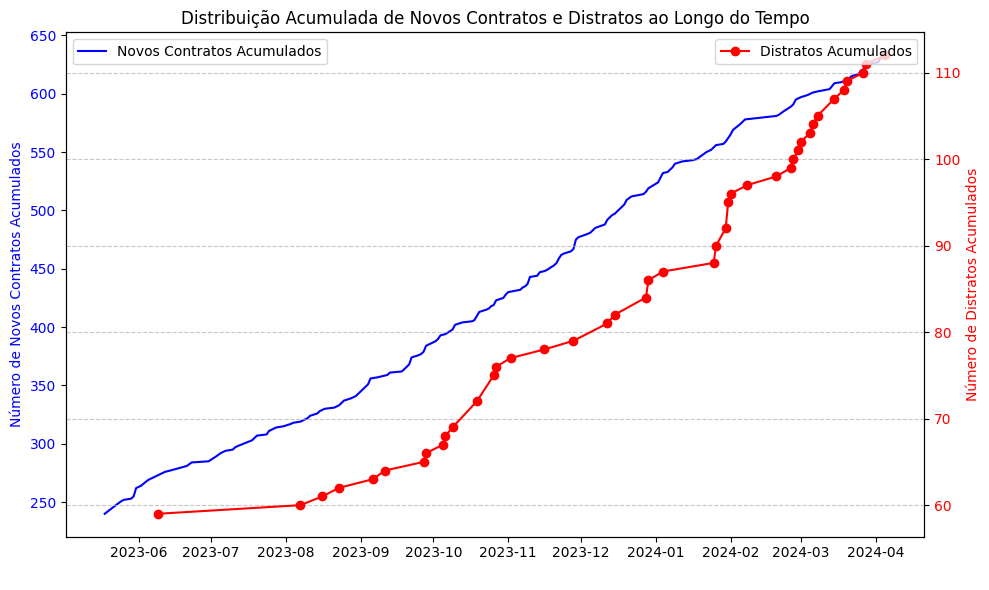

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotar a distribuição acumulada de novos contratos
ax1.plot(distribuicao_acumulada['dataf_c'], distribuicao_acumulada['n'], color='b', marker=' ', linestyle='-', label='Novos Contratos Acumulados')
ax1.set_xlabel(' ')
ax1.set_ylabel('Número de Novos Contratos Acumulados', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Criar o segundo eixo y compartilhado com o primeiro
ax2 = ax1.twinx()

# Plotar a soma cumulativa de distratos
ax2.plot(distratos_sem_outliers['dataf_up'], distratos_acumulados, color='r', marker='o', linestyle='-', label='Distratos Acumulados')
ax2.set_ylabel('Número de Distratos Acumulados', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

plt.title('Distribuição Acumulada de Novos Contratos e Distratos ao Longo do Tempo')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


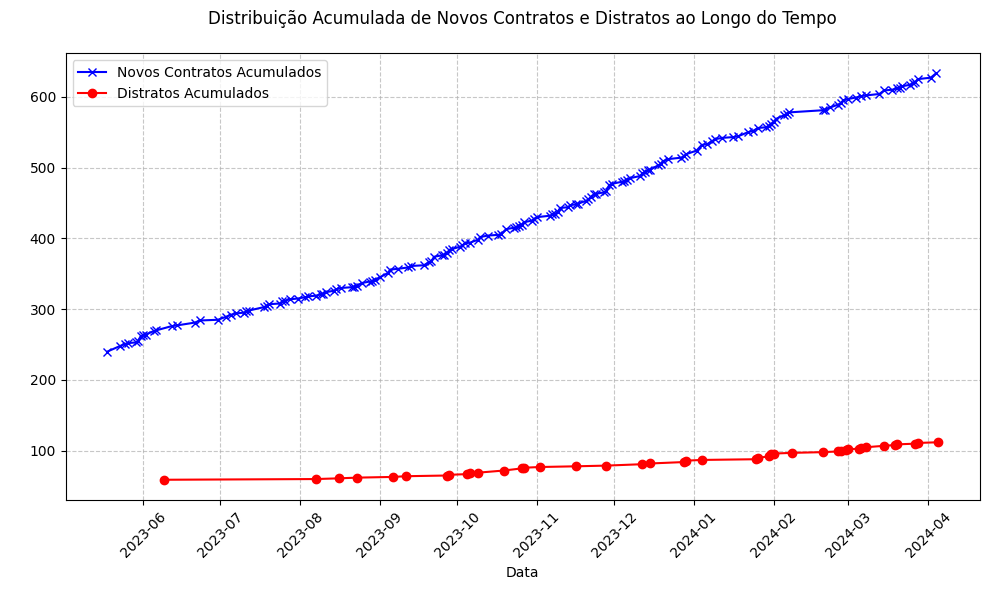

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar a distribuição acumulada de novos contratos
ax.plot(distribuicao_acumulada['dataf_c'], distribuicao_acumulada['n'], color='b', marker='x', linestyle='-', label='Novos Contratos Acumulados')
ax.set_xlabel('Data')
ax.set_ylabel('Número de Novos Contratos Acumulados', color='b')
ax.legend(loc='upper left')

# Plotar a soma cumulativa de distratos
ax.plot(distratos_sem_outliers['dataf_up'], distratos_acumulados, color='r', marker='o', linestyle='-', label='Distratos Acumulados')
ax.set_ylabel(' ', color='r')
ax.legend(loc='upper right')

plt.title('Distribuição Acumulada de Novos Contratos e Distratos ao Longo do Tempo' '\n')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
ax.legend(loc='upper left')
plt.show()